## Data Load and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cross-verified-database.csv', encoding='latin-1')

In [3]:
df.head()

,wikidata_code,birth,death,updated_death_date,approx_birth,approx_death,birth_min,birth_max,death_min,death_max,...,area2_of_rattachment,list_wikipedia_editions,un_region,group_wikipedia_editions,bplo1,dplo1,bpla1,dpla1,pantheon_1,level3_all_occ
0,Q1000002,1932.0,1990.0,NaN,NaN,NaN,1932.0,1932.0,1990.0,1990.0,...,Missing,dewiki,Europe,grB,11.833333,12.420000,53.416668,54.381390,0,D:_playwright_journalist_writer_screenwriter_P...
1,Q1000005,1860.0,1927.0,NaN,NaN,NaN,1860.0,1860.0,1927.0,1927.0,...,Missing,dewiki|cswiki|enwiki|eowiki|itwiki|kkwiki|rowi...,Europe,grA,12.929798,14.421389,49.440605,50.087502,0,D:_writer_journalist_P:_naturalist_writer_jour...
2,Q1000006,1971.0,NaN,NaN,NaN,NaN,1971.0,1971.0,NaN,NaN,...,Missing,dewiki,Europe,grB,9.191944,NaN,48.897499,NaN,0,D:_film_screenwriter_film_P:_regisseur_autor_f...
3,Q1000015,1983.0,NaN,NaN,NaN,NaN,1983.0,1983.0,NaN,NaN,...,Missing,dewiki,Europe,grB,13.383333,NaN,52.516666,NaN,0,D:_actor_P:_schauspiel_German
4,Q1000023,1912.0,1977.0,NaN,NaN,NaN,1912.0,1912.0,1977.0,1977.0,...,Missing,dewiki,Europe,grB,13.350000,8.400000,52.433300,49.016666,0,D:_judge_jurist_P:_ richter_verfassung_German


In [4]:
df.columns

Index(['wikidata_code', 'birth', 'death', 'updated_death_date', 'approx_birth',
       'approx_death', 'birth_min', 'birth_max', 'death_min', 'death_max',
       'gender', 'level1_main_occ', 'name', 'un_subregion', 'birth_estimation',
       'death_estimation', 'bigperiod_birth_graph_b',
       'bigperiod_death_graph_b', 'curid', 'level2_main_occ', 'freq_main_occ',
       'freq_second_occ', 'level2_second_occ', 'level3_main_occ',
       'bigperiod_birth', 'bigperiod_death', 'wiki_readers_2015_2018',
       'non_missing_score', 'total_count_words_b', 'number_wiki_editions',
       'total_noccur_links_b', 'sum_visib_ln_5criteria',
       'ranking_visib_5criteria', 'all_geography_groups',
       'string_citizenship_raw_d', 'citizenship_1_b', 'citizenship_2_b',
       'list_areas_of_rattach', 'area1_of_rattachment', 'area2_of_rattachment',
       'list_wikipedia_editions', 'un_region', 'group_wikipedia_editions',
       'bplo1', 'dplo1', 'bpla1', 'dpla1', 'pantheon_1', 'level3_all_occ'],
 

### Drop NULL/ Values

In [5]:
# ---- (1) Keep only individuals with valid birth/death years ----
df_clean = df.copy()

df_clean = df_clean[
    df_clean['birth'].notna() &
    df_clean['death'].notna()
]

# ---- (2) Filter Birth Years >= 1500
df_clean = df_clean[df_clean['birth'] >= 1500]

# ---- (3) Filter out entries missing occupation info ----
df_clean = df_clean[df_clean['level1_main_occ'].notna()]

# ---- (4) Filter out missing or inconsistent gender entries ----
df_clean = df_clean[df_clean['gender'].isin(['Male', 'Female'])]

In [6]:
df_clean.head()

,wikidata_code,birth,death,updated_death_date,approx_birth,approx_death,birth_min,birth_max,death_min,death_max,...,area2_of_rattachment,list_wikipedia_editions,un_region,group_wikipedia_editions,bplo1,dplo1,bpla1,dpla1,pantheon_1,level3_all_occ
0,Q1000002,1932.0,1990.0,NaN,NaN,NaN,1932.0,1932.0,1990.0,1990.0,...,Missing,dewiki,Europe,grB,11.833333,12.420000,53.416668,54.381390,0,D:_playwright_journalist_writer_screenwriter_P...
1,Q1000005,1860.0,1927.0,NaN,NaN,NaN,1860.0,1860.0,1927.0,1927.0,...,Missing,dewiki|cswiki|enwiki|eowiki|itwiki|kkwiki|rowi...,Europe,grA,12.929798,14.421389,49.440605,50.087502,0,D:_writer_journalist_P:_naturalist_writer_jour...
4,Q1000023,1912.0,1977.0,NaN,NaN,NaN,1912.0,1912.0,1977.0,1977.0,...,Missing,dewiki,Europe,grB,13.350000,8.400000,52.433300,49.016666,0,D:_judge_jurist_P:_ richter_verfassung_German
5,Q1000026,1928.0,2016.0,NaN,NaN,NaN,1928.0,1928.0,2016.0,2016.0,...,Missing,dewiki,America,grB,-73.990280,-74.656944,40.692780,40.352222,0,D:_curator_P:_kurat_German
6,Q1000034,1818.0,1894.0,NaN,NaN,NaN,1818.0,1818.0,1894.0,1894.0,...,Missing,dewiki|svwiki,Europe,grB,7.667770,8.400000,47.957283,49.016666,0,D:_mathematician_P:_mathematiker_German_matema...


### Add a column for birth decade

In [7]:
df_clean['birth_decade'] = (df_clean['birth'] // 10) * 10

## Question 1) How does average lifespan vary across different occupations?

We want to estimate:

$
\text{Average lifespan} = \mathbb{E}[\text{death} - \text{birth} \mid \text{occupation}]
$

### Add a column for lifespan

In [8]:
df_clean['lifespan'] = df_clean['death'] - df_clean['birth']

### Filter valid lifespans (0,120)

In [9]:
df_clean = df_clean[
    (df_clean['lifespan'] > 0) &
    (df_clean['lifespan'] < 120)
]

### Aggregate lifespan statistics (mean, count, standard deviation)

In [10]:
def weighted_mean(values, weights):
    """Compute weighted mean, ignoring NaNs."""
    mask = ~np.isnan(values) & ~np.isnan(weights)
    if mask.sum() == 0:
        return np.nan
    return np.average(values[mask], weights=weights[mask])

# ---- Group and compute metrics ----
grouped = df_clean.groupby(['level2_main_occ', 'gender'])

results = []

for (occ, gender), group in grouped:
    lifespans = group['lifespan'].values
    weights = group['sum_visib_ln_5criteria'].values

    # IQR
    q75, q25 = np.percentile(lifespans, [75, 25])
    iqr = q75 - q25

    results.append({
        'occupation': occ,
        'gender': gender,
        'mean_lifespan': np.mean(lifespans),
        'median_lifespan': np.median(lifespans),
        'std_lifespan': np.std(lifespans, ddof=1),
        'iqr_lifespan': iqr,
        'count': len(group),
        'weighted_mean_lifespan': weighted_mean(lifespans, weights)
    })

lifespan_by_occ = (
    pd.DataFrame(results)
    .sort_values('mean_lifespan', ascending=False)
)


In [11]:
lifespan_by_occ

,occupation,gender,mean_lifespan,median_lifespan,std_lifespan,iqr_lifespan,count,weighted_mean_lifespan
0,Academia,Female,76.644247,80.0,15.958673,21.00,11716,76.607015
28,Worker/Business (small),Female,76.205167,80.0,16.653408,20.00,1974,75.897581
4,Corporate/Executive/Business (large),Female,76.076655,78.0,15.455899,22.00,861,75.995482
2,Administration/Law,Female,74.546565,78.0,16.646384,22.00,1310,74.430308
22,Politics,Female,74.137416,78.0,17.420716,22.00,10974,73.863903
5,Corporate/Executive/Business (large),Male,73.611774,75.0,13.207608,18.00,21879,73.721175
10,Explorer/Inventor/Developer,Female,73.274760,76.0,17.155246,23.00,313,73.049973
6,Culture-core,Female,73.081850,77.0,17.449447,23.00,50446,73.012071
1,Academia,Male,72.987706,75.0,14.248490,18.00,128356,73.116475
8,Culture-periphery,Female,72.619455,77.0,18.624519,25.00,4328,72.278730


### Plot average lifespan by occupation

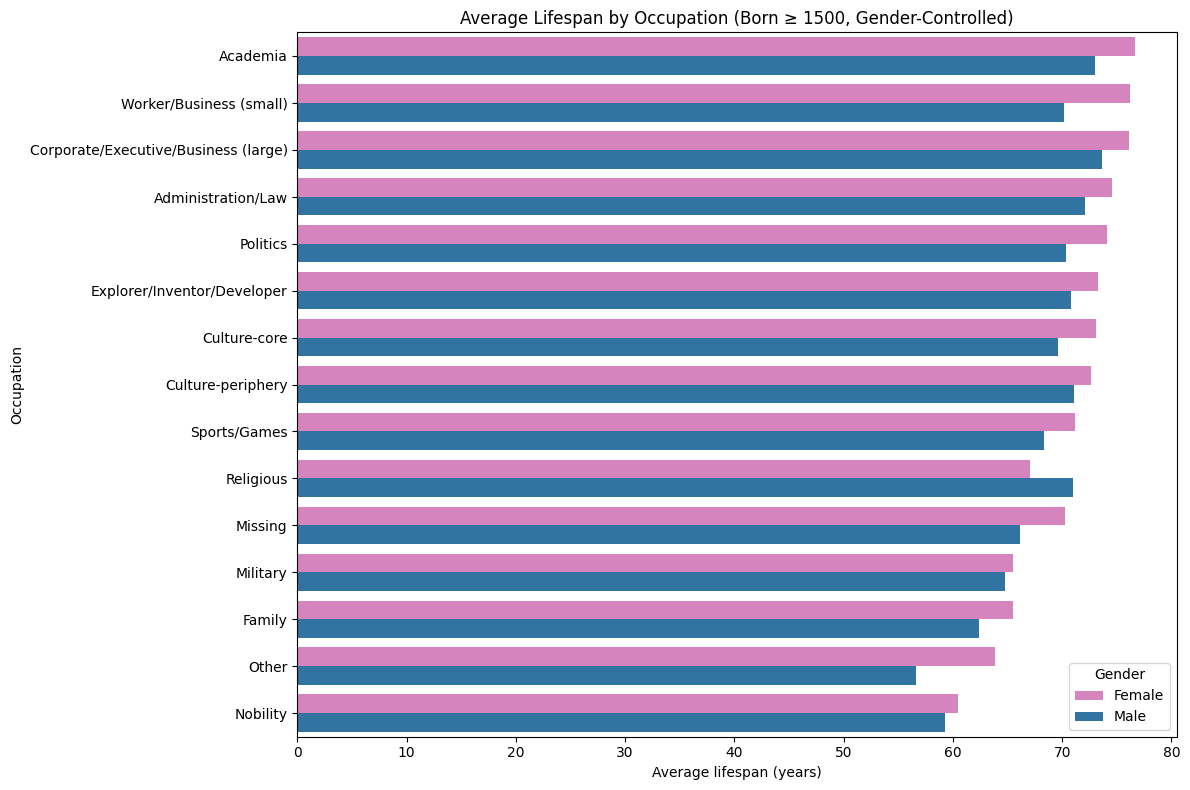

In [12]:
gender_palette = {
    'Male': '#1f77b4',   # blue-ish
    'Female': '#e377c2'  # pink/magenta-ish
}

plt.figure(figsize=(12, 8))
sns.barplot(
    data=lifespan_by_occ,
    x='mean_lifespan',
    y='occupation',
    hue='gender',
    palette=gender_palette
)
plt.title("Average Lifespan by Occupation (Born ≥ 1500, Gender-Controlled)")
plt.xlabel("Average lifespan (years)")
plt.ylabel("Occupation")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

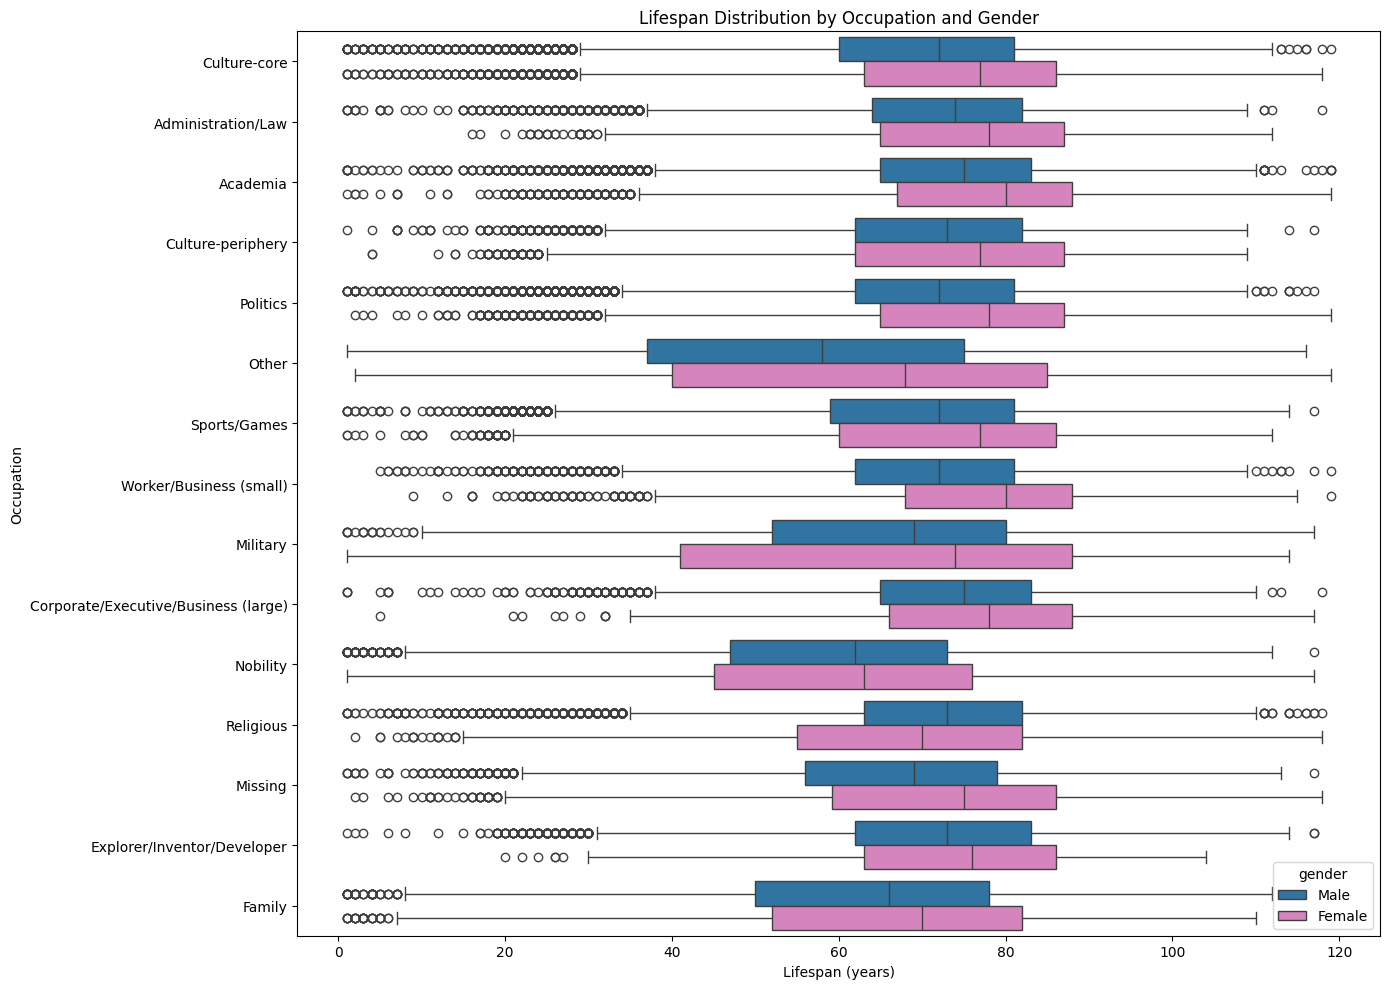

In [13]:
plt.figure(figsize=(14, 10))
sns.boxplot(
    data=df_clean,
    x='lifespan',
    y='level2_main_occ',
    hue='gender',
    palette=gender_palette
)
plt.title("Lifespan Distribution by Occupation and Gender")
plt.xlabel("Lifespan (years)")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

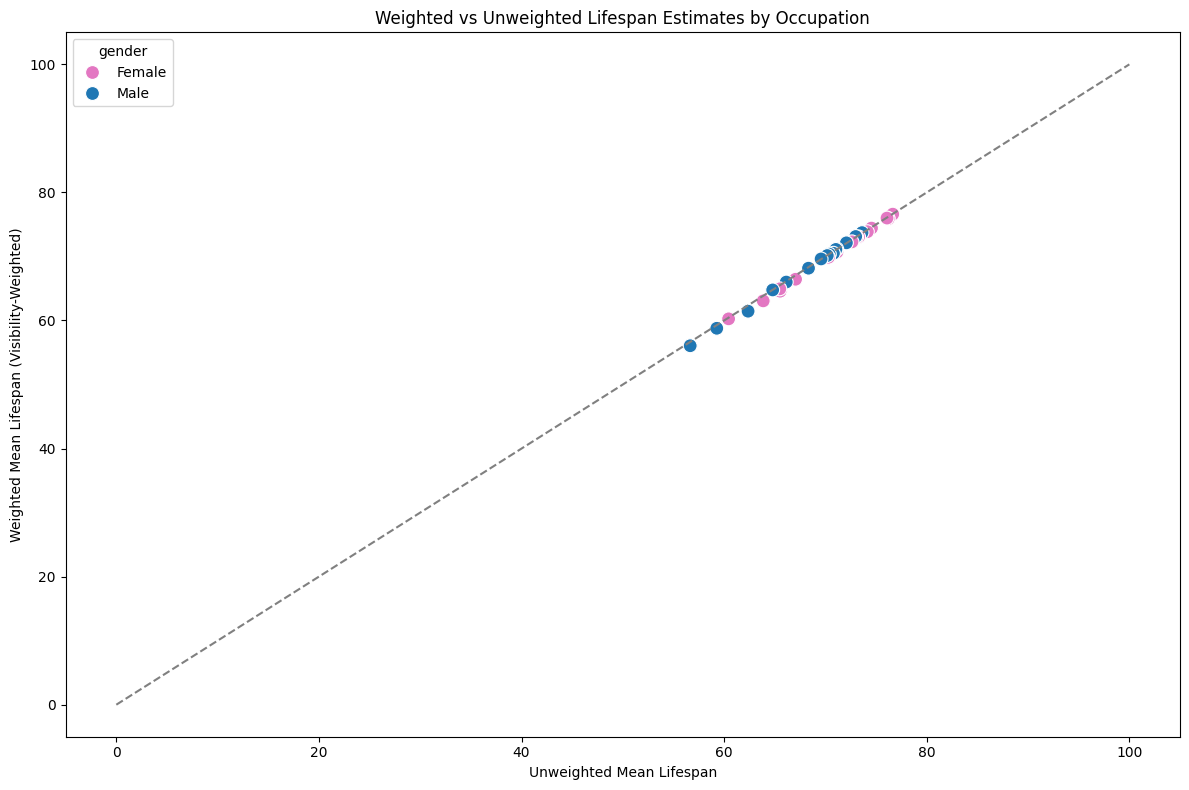

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=lifespan_by_occ,
    x='mean_lifespan',
    y='weighted_mean_lifespan',
    hue='gender',
    palette=gender_palette,
    s=100
)
plt.plot([0, 100], [0, 100], ls='--', color='gray')  # identity line
plt.title("Weighted vs Unweighted Lifespan Estimates by Occupation")
plt.xlabel("Unweighted Mean Lifespan")
plt.ylabel("Weighted Mean Lifespan (Visibility-Weighted)")
plt.tight_layout()
plt.show()


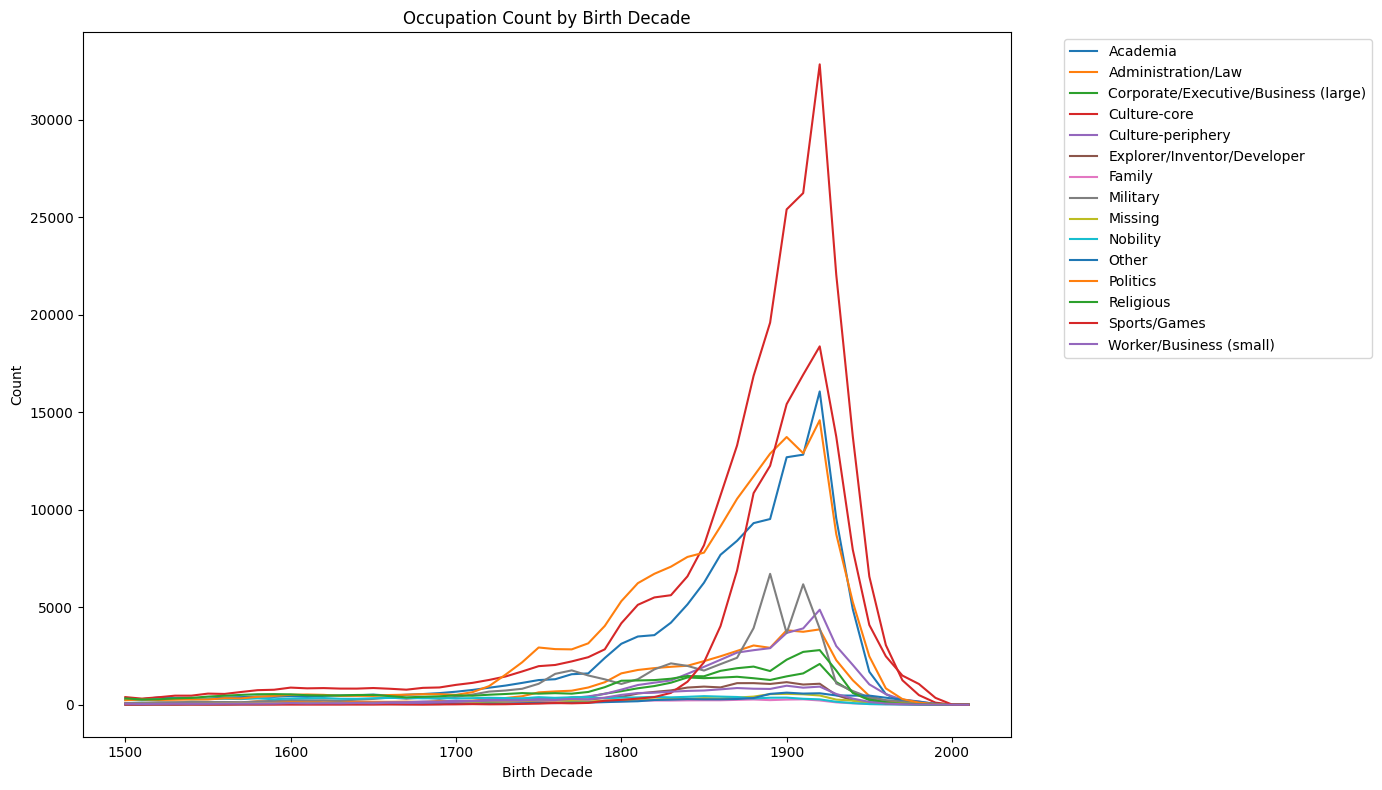

In [15]:
# Group by birth_decade and occupation
occ_by_decade = (
    df_clean
    .groupby(['birth_decade', 'level2_main_occ'])
    .size()
    .reset_index(name='count')
)

# Pivot for easier plotting (optional)
occ_pivot = occ_by_decade.pivot(
    index='birth_decade',
    columns='level2_main_occ',
    values='count'
).fillna(0)

# Plot each occupation as a separate line per decade
plt.figure(figsize=(14, 8))

for occ in occ_pivot.columns:
    plt.plot(
        occ_pivot.index,
        occ_pivot[occ],
        label=occ
    )

plt.title("Occupation Count by Birth Decade")
plt.xlabel("Birth Decade")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

### One-Way Anova for Lifespan differences across Occupation Groups

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANOVA model
model = ols('lifespan ~ C(level2_main_occ)', data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("=== One-Way ANOVA Results ===")
print(anova_table)

=== One-Way ANOVA Results ===
                          sum_sq        df            F  PR(>F)
C(level2_main_occ)  7.087415e+06      14.0  1957.711431     0.0
Residual            2.507846e+08  969817.0          NaN     NaN


### Tukey’s HSD if Anova is significant (p<0.05)

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD test
tukey = pairwise_tukeyhsd(
    endog=df_clean['lifespan'],          # Dependent variable
    groups=df_clean['level2_main_occ'],  # Factor variable
    alpha=0.05                           # Significance level
)

print("\n=== Tukey's HSD Post-Hoc Test ===")
print(tukey.summary())


=== Tukey's HSD Post-Hoc Test ===
                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                                
               group1                               group2                meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------------------------------
                            Academia                   Administration/Law  -1.1548    0.0  -1.4462  -0.8634   True
                            Academia Corporate/Executive/Business (large)   0.4116 0.0268   0.0217   0.8014   True
                            Academia                         Culture-core  -3.0401    0.0  -3.2209  -2.8592   True
                            Academia                    Culture-periphery    -2.03    0.0  -2.3314  -1.7287   True
                            Academia          Explorer/Inventor/Developer  -2.4527    0.0  -2.9214  -1.9841   True
                            Academia         

## Question 2) Is lifespan correlated with a) gender and b) the birth year?

In [19]:
# Fit a regression model to adjust lifespan for birth decade
import statsmodels.formula.api as smf

model = smf.ols(
    formula="lifespan ~ C(gender) + birth_decade",
    data=df_clean
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               lifespan   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:28:37   Log-Likelihood:            -4.0734e+06
No. Observations:              969832   AIC:                         8.147e+06
Df Residuals:                  969829   BIC:                         8.147e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.6921      0.36

In [18]:
model = smf.ols(
    formula="lifespan ~ C(level2_main_occ) + C(gender) + birth_decade",
    data=df_clean
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               lifespan   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     3022.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:27:14   Log-Likelihood:            -4.0599e+06
No. Observations:              969832   AIC:                         8.120e+06
Df Residuals:                  969815   BIC:                         8.120e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------